In [240]:
%matplotlib notebook

<IPython.core.display.Javascript object>


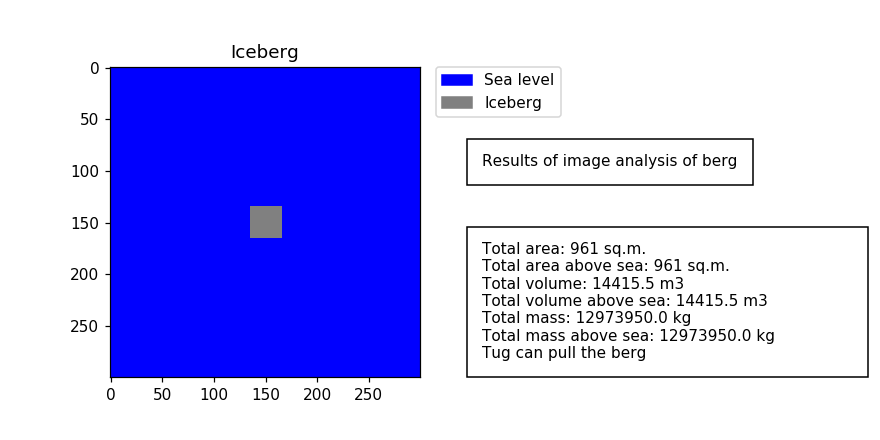

In [241]:
# -*- coding: utf-8 -*-
"""

Title: Assignment 2. Module GEOG5991M
       White Star Line Project

Version: 1.0
The version was built to analyse SINGLE iceberg images 
       
Link to Github: https://github.com/ohajiyev/Assignment2
    
Last updated on Mar 26, 2019

@author: Orkhan Hajiyev (gy17oh)

Python version: 3.7 (Python 3.7.1 64-bit | Qt 5.9.6 | PyQt5 5.9.2 | Windows 10)

The code is written in Spyder Version 3.3.2

!!! Important note: some part of the code may be copied and modified from 
!!! https://docs.python.org/3/ as a reference

The purpuse of the script is to implement the requirements of the 
Assignment 2 of the Module GEOG5991M.

White Star Line was selected as the project to satisfy the assignment's
description. The link to the project's problem definition:
    https://www.geog.leeds.ac.uk/courses/computing/
    study/core-python-odl/assessment2/ice.html
    
Copyright (c) 2019 Orkhan Hajiyev
Lisence under MIT License
License link: https://github.com/ohajiyev/Assignment2/blob/master/LICENSE.md

"""

#==============================================================================
# Import modules

import sys
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import numpy as np
#%matplotlib qt

# End of Import modules
#==============================================================================


#==============================================================================
# Iceberg class definition. 

class Iceberg():    
    def __init__ (self, radar_data_texture, lidar_data_height):
        self._total_mass = 0 # kg
        self._total_mass_above_sea = 0 # kg
        self._total_volume = 0 # m3
        self._total_volume_above_sea = 0 # m3
        self._total_area = 0 # m2
        self._total_area_above_sea = 0 # m2
        #self._total_height = 0 # m
        #self._total_height_above_sea = 0 # m
        self.radar_data_texture = radar_data_texture
        self.lidar_data_height = lidar_data_height
        self._pullable_threshold = 36000000 # kg
        self._berg_pullable = False
        
        self.calc_iceberg_params()
        
    # Set the property of the private variables to use Incapsulation
    ###########################################################################
    
    @property
    def total_mass(self):
        """Get the 'total_mass' property."""
        return self._total_mass

    @total_mass.setter
    def total_mass(self, value):
        """Set the 'total_mass' property."""
        self._total_mass = round(value, 1)

    @total_mass.deleter
    def total_mass(self):
        """Delete the 'total_mass' property."""
        del self._total_mass    

    @property
    def total_mass_above_sea(self):
        """Get the 'total_mass_above_sea' property."""
        return self._total_mass_above_sea

    @total_mass_above_sea.setter
    def total_mass_above_sea(self, value):
        """Set the 'total_mass_above_sea' property."""
        self._total_mass_above_sea = round(value, 1)

    @total_mass_above_sea.deleter
    def total_mass_above_sea(self):
        """Delete the 'total_mass_above_sea' property."""
        del self._total_mass_above_sea 
        
    @property
    def total_volume(self):
        """Get the 'total_volume' property."""
        return self._total_volume

    @total_volume.setter
    def total_volume(self, value):
        """Set the 'total_volume' property."""
        self._total_volume = round(value, 1)

    @total_volume.deleter
    def total_volume(self):
        """Delete the 'total_volume' property."""
        del self._total_volume 
        
    @property
    def total_volume_above_sea(self):
        """Get the 'total_volume_above_sea' property."""
        return self._total_volume_above_sea

    @total_volume.setter
    def total_volume_above_sea(self, value):
        """Set the 'total_volume_above_sea' property."""
        self._total_volume_above_sea = round(value, 1)

    @total_volume.deleter
    def total_volume_above_sea(self):
        """Delete the 'total_volume_above_sea' property."""
        del self._total_volume_above_sea 
 
    @property
    def total_area(self):
        """Get the 'total_area' property."""
        return self._total_area

    @total_area.setter
    def total_area(self, value):
        """Set the 'total_area' property."""
        self._total_area = round(value, 1)

    @total_area.deleter
    def total_area(self):
        """Delete the 'total_area' property."""
        del self._total_area 
        
    @property
    def total_area_above_sea(self):
        """Get the 'total_area_above_sea' property."""
        return self._total_area_above_sea

    @total_area.setter
    def total_area_above_sea(self, value):
        """Set the 'total_area_above_sea' property."""
        self._total_area_above_sea = round(value, 1)

    @total_area.deleter
    def total_area_above_sea(self):
        """Delete the 'total_area_above_sea' property."""
        del self._total_area_above_sea
    
    # End of property
    ###########################################################################
        
    def calc_iceberg_params(self):
        """
        Calculate the total mass above sea, tha volume of the iceberg
    
        """
        cell_area = 1 # 
        for y in range(299):
            for x in range(299):
                if self.radar_data_texture[x][y] >= 100:
                    self._total_area += 1
                    self._total_volume += self.lidar_data_height[x][y] / 10 \
                                            * cell_area
                    
                    if self.lidar_data_height[x][y] > 0:
                        self._total_area_above_sea += 1
                        self._total_volume_above_sea += \
                                            self.lidar_data_height[x][y] / 10
                                            
        if (self._total_area_above_sea / self._total_area) * 100 >= 10:
            self._total_mass = 900 * self._total_volume 
        self._total_mass_above_sea = 900 * self._total_volume_above_sea
        
        if self._total_mass < self._pullable_threshold:
            self._berg_pullable = True
        
    def __str__(self):
        return 'Total area: {0} sq.m.\
                \nTotal area above sea: {1} sq.m.\
                \nTotal volume: {2} m3\
                \nTotal volume above sea: {3} m3\
                \nTotal mass: {4} kg\
                \nTotal mass above sea: {5} kg\
                \nTug {6} pull the berg'\
                .format(round(self._total_area,1), \
                        round(self._total_area_above_sea,1),\
                        round(self._total_volume,1), \
                        round(self._total_volume_above_sea,1),\
                        round(self._total_mass,1), \
                        round(self._total_mass_above_sea,1), \
                        ('can' if self._berg_pullable else 'cannot'))
        
# End of Iceberg class definition
#==============================================================================


#==============================================================================
# Function definitions
                
                
def draw_result(image, icebergs):
                    
    #!!!!!!!! The following resources were used in the creation of the method 
    # https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-
    # in-matplotlib
    # https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-
    # for-imshow-in-matplotlib/9708079
    #!!!!!!!! Start of the method
    
    # Create the variable with 0 and 1. 0 refer to the sea level, 1 to 
    # the iceberg
    ice_data = (image >= 100).astype(np.int)
    
    # Get the unique values from data. In this case it will be 0 and 1
    values = np.unique(ice_data.ravel())
    
    # Create the dictionary of unique values
    value_description = {0: 'Sea level', 1: 'Iceberg'}
    
    # Create two plot area, one for image visualisation and the second will
    # be used for showing the result text
    fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)
        
    # Make a color map of fixed colors, blue for the sea and grey for 
    # the iceberg
    cmap = colors.ListedColormap(['blue', 'grey'])
    bounds=[0,0.5,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    # Plot image with predefined colors
    im = ax[0].imshow(ice_data, interpolation='none', cmap=cmap, norm=norm)
    
    # Identify the colors from the plot. In this case it is ['blue', 'grey']
    colors_image = [ im.cmap(im.norm(value)) for value in values]
    
    # Create a patch for every color 
    patches = [mpatches.Patch(color=colors_image[i], label="{}".
                    format(value_description[i]) ) for i in range(len(values))]
    
    # Put those patched as legend-handles into the legend
    ax[0].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, 
      borderaxespad=0.)
    
    ax[0].set_title('Iceberg')
    
    ax[1].text(0, 100, 'Results of image analysis of berg', bbox={'facecolor': 
        'white', 'pad': 10})
    
    ax[1].text(0, 270, str(icebergs[0]), bbox={'facecolor': 'white', 
      'pad': 10})
    
    ax[1].axis('off')
    
    plt.show()
    
    #!!!!!!!! End of the method

def draw_environment(environment):
    """
    Draw environment

    Arguments:
    environment -- list variable contains the data of iceberg environment
                   (no default)

    Returns:
    Plot of environment variable.
    """
    plt.xlim(0, 299)
    plt.ylim(299, 0)
    plt.imshow(environment)
    plt.show()
    
def read_file(file_name):    
    # Try to read the input files
    # Note: assigning new value to environment variable make it local,
    # so return function was used
    try:
        environment = np.loadtxt(file_name, delimiter = (','))
        return environment     
    except IOError as err:
        print(err)
    except:
        print("Unexpected error:", sys.exc_info()[0])
        
def write_file(file_name, result_text):    
    # Try to write the result to the output file
    try:
        with open(file_name, 'w') as file_object:
            file_object.write(result_text)      
    except IOError as err:
        print(err)
    except:
        print("Unexpected error:", sys.exc_info()[0])

# End of Function definitions
#==============================================================================


#==============================================================================
# Create variables. 

radar_data_texture = [] # empty list of data which contains texture of objects
                         # read from radar file   
lidar_data_height = [] # empty list of data which contains height of objects
                        # read from lidar file 
icebergs = [] # empty list of Iceberg objects

# Define input file paths for single bergs
lidar_data_file_path = 'input/white1.lidar'
radar_data_file_path = 'input/white1.radar'

# Define input file paths for multiple bergs
#lidar_data_file_path = 'input/white2.lidar'
#radar_data_file_path = 'input/white2.radar'

# Define output file path
output_file_path = 'output/results.txt'

# End of Create variables
#==============================================================================

# Read input files and assign texture and height info to the variables
lidar_data_height = read_file(lidar_data_file_path)
radar_data_texture = read_file(radar_data_file_path)
    
# Draw input image data
#draw_environment(radar_data_texture)
#draw_environment(lidar_data_height)

# Create the Iceberg object from the input  image files
icebergs.append(Iceberg(radar_data_texture, lidar_data_height))

# Draw result in the canvas
draw_result(radar_data_texture, icebergs)

# Write the results of the analysis to text file
write_file(output_file_path, str(icebergs[0]))
